In [1]:
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.signal as signal

In [2]:
# 读取数据至字典键值对
with open('new.txt','r') as f:
    data = {}
    line = f.readline()
    while line:
        if line != '\n':
            tmp = list(map(lambda x: float(x), list(line.split())))
#             print('test', tmp[1], tmp[3], tmp[4])
            if tmp[3] in data:
                data[tmp[3]] += tmp[4]
            else:
                data[tmp[3]] = tmp[4]
        line = f.readline()
    data[0.0] /= 2  # 与数据结构有关，第一个值重发

In [3]:
# 中间变量，用于求极值点
x = np.array(list(data.keys()))
y = np.array(list(data.values()))

In [4]:
# 极值点 角度位置，单位弧度
dd = x[signal.argrelextrema(y, np.greater)]
dd

array([0.05235988, 0.68067841, 1.30899694, 1.93731547, 2.565634  ,
       3.19395253, 3.82227106, 4.45058959, 5.07890812, 5.70722665])

In [5]:
# 极值点间隔，单位 弧度
v = np.array([abs(dd[i+1] - dd[i]) for i in range(len(dd)-1)])

In [6]:
# 最后一个间隔数据
v = np.append(v, np.pi * 2 - dd[-1] + dd[0])
v

array([0.62831853, 0.62831853, 0.62831853, 0.62831853, 0.62831853,
       0.62831853, 0.62831853, 0.62831853, 0.62831853, 0.62831853])

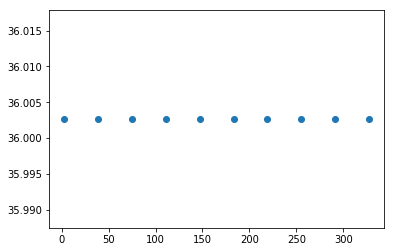

In [7]:
# 画图，使用角度制
plt.scatter(dd*57.3,v*57.3)